## Model Development using pretrained deeplearning 
- load dataset
- split to training, validation and testing
- build pretrained model
- train model
- evaluate - save


In [1]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Concatenate, concatenate
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
import tensorflow as tf

import pandas as pd

2022-11-05 11:36:35.486232: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-05 11:36:35.598257: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-05 11:36:35.598273: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-05 11:36:35.630672: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-05 11:36:36.250730: W tensorflow/stream_executor/platform/de

In [2]:
import sys
sys.path.append('../scripts')
from dataset_loader import DatasetLoader
dl = DatasetLoader()


## get the numerical features

In [3]:
numeric_df = dl.read_numerical_data()
numeric_df.head()

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,id,ER,CTR
0,5.966597,-0.875527,4.228910,1.227844,-5.080250,4.705445,0.060572,3.051015,-0.175810,3.127903,...,2.941808e-31,8.698547e-31,-8.986015e-33,9.681507e-32,9.671273e-32,3.972531e-32,1.305191e-31,ed3071a667a11cc56e88ae0489bfe6aa,0.130945,0.003018
1,6.199574,-0.208893,1.033639,0.443246,-3.230872,2.281240,0.817452,1.537422,-0.728240,-0.246637,...,4.061983e-31,1.054947e-30,9.702705e-32,2.489351e-31,-4.212772e-32,5.718141e-32,5.638410e-33,4799763419d621cd41e7fb8abbcdd45d,0.119002,0.045814
2,4.808152,-1.228349,9.675247,0.373994,-5.530096,4.320427,0.266141,0.484820,3.642968,0.824212,...,2.873673e-31,9.497874e-31,2.269051e-32,3.571017e-32,1.507880e-31,1.479482e-32,6.357522e-32,bf1f7af46eec0e92939a8b3ba51cbacd,0.021841,0.003419
3,6.296626,-0.031434,1.123966,0.403817,-3.274790,2.300532,0.810319,1.454204,-0.703022,-0.199442,...,4.722566e-31,1.150084e-30,1.459500e-31,2.847329e-31,-9.573101e-32,6.409863e-32,-1.038049e-32,e68e20f592457b875ce29757ab855dfe,0.103688,0.042228
4,3.957764,-0.033983,1.143082,0.301815,-4.055218,2.380942,1.536560,1.216737,-1.139426,-0.577287,...,2.878674e-31,9.302627e-31,6.748744e-33,1.187104e-31,3.532113e-32,-1.003240e-32,5.644234e-32,6a8e741867d4f893afad015b77b52c39,0.133475,0.031322


## Get the image data

In [4]:
img_df = dl.read_image_data()
img_df.head()

,img,id
0,"[[[0.003921569, 0.003921569, 0.105882354], [0....",ed3071a667a11cc56e88ae0489bfe6aa
1,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",4799763419d621cd41e7fb8abbcdd45d
2,"[[[0.13333334, 0.78431374, 1.0], [0.13333334, ...",bf1f7af46eec0e92939a8b3ba51cbacd
3,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",e68e20f592457b875ce29757ab855dfe
4,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",6a8e741867d4f893afad015b77b52c39


## merge the numeric and image dataset 

In [5]:
dataset = dl.merge_data_from_multiple_source()
print(dataset.shape)
dataset.head()

(546, 259)


,img,0,1,2,3,4,5,6,7,8,...,248,249,250,251,252,253,254,255,ER,CTR
0,"[[[0.003921569, 0.003921569, 0.105882354], [0....",5.966597,-0.875527,4.228910,1.227844,-5.080250,4.705445,0.060572,3.051015,-0.175810,...,3.704310e-31,2.941808e-31,8.698547e-31,-8.986015e-33,9.681507e-32,9.671273e-32,3.972531e-32,1.305191e-31,0.130945,0.003018
1,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",6.199574,-0.208893,1.033639,0.443246,-3.230872,2.281240,0.817452,1.537422,-0.728240,...,2.147750e-31,4.061983e-31,1.054947e-30,9.702705e-32,2.489351e-31,-4.212772e-32,5.718141e-32,5.638410e-33,0.119002,0.045814
2,"[[[0.13333334, 0.78431374, 1.0], [0.13333334, ...",4.808152,-1.228349,9.675247,0.373994,-5.530096,4.320427,0.266141,0.484820,3.642968,...,3.641521e-31,2.873673e-31,9.497874e-31,2.269051e-32,3.571017e-32,1.507880e-31,1.479482e-32,6.357522e-32,0.021841,0.003419
3,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",6.296626,-0.031434,1.123966,0.403817,-3.274790,2.300532,0.810319,1.454204,-0.703022,...,2.162406e-31,4.722566e-31,1.150084e-30,1.459500e-31,2.847329e-31,-9.573101e-32,6.409863e-32,-1.038049e-32,0.103688,0.042228
4,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",3.957764,-0.033983,1.143082,0.301815,-4.055218,2.380942,1.536560,1.216737,-1.139426,...,2.704146e-31,2.878674e-31,9.302627e-31,6.748744e-33,1.187104e-31,3.532113e-32,-1.003240e-32,5.644234e-32,0.133475,0.031322


## split dataset

In [6]:
y = dataset['CTR']
x = dataset.drop(['ER','CTR'],axis=1)
img_train_data,img_test_data,numeric_train,numeric_test, y_train, y_test = dl.dataset_preprocess(x,y)

In [17]:
def create_mlp(x):
    x = Dense(256, activation="relu")(x)
    x = Dense(512, activation="relu")(x)
    x = Dense(128, activation="relu")(x) 
    return x

def mode4text_feature(x):
    x = Dense(256, activation="relu")(x)
    x = Dense(512, activation="relu")(x)
    x = Dense(128, activation="relu")(x) 
    return x

def pretrained_cnn_model(x_inputs):
    mobilenetv2 = tf.keras.applications.MobileNetV2(
        input_tensor = x_inputs, 
        weights="imagenet", include_top=False, alpha=0.35) 
    x = mobilenetv2.get_layer('out_relu').output
    x = GlobalAveragePooling2D(name='gap')(x)
    x = Dense(128,activation='relu')(x)
    return x

In [18]:
def build_model(input1_shape, input2_shape,input3_shape):
    input1 = Input(shape=input1_shape, name="input_image")
    input2 = Input(shape=input2_shape, name="input_numerical") 
    # input3 = Input(shape=input3_shape, name="input_text")  
    
    x_image = pretrained_cnn_model(input1)
    x_numerical = create_mlp(input2)
    # x_text = mode4text_feature(input3)
    
    x = Concatenate(axis=1)([x_image,x_numerical])
    x = Dense(20, activation='relu')(x)
    x = Dense(1, activation="linear")(x)

    return tf.keras.Model(inputs=[input1,input2],outputs=x)

In [19]:
model = build_model(input1_shape=(256,256,3), input2_shape=(256),input3_shape=(256))
opt =  tf.keras.optimizers.Adam(learning_rate=1e-5, decay=1e-5 / 200)
model.compile(loss="mean_absolute_percentage_error", optimizer=opt)

In [20]:
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_image (InputLayer)       [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 128, 128, 16  432         ['input_image[0][0]']            
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 128, 128, 16  64          ['Conv1[0][0]']                  
                                )                                                           

In [21]:
history = model.fit(
    x=[
        tf.cast(img_train_data,tf.float64),
        tf.cast(numeric_train,tf.float64)
        ],
    y = tf.cast(y_train, tf.float64),
    epochs=50,batch_size=8)

Epoch 1/50
55/55 [==============================] - 14s 201ms/step - loss: 10148583.0000
Epoch 2/50
55/55 [==============================] - 11s 200ms/step - loss: 4561951.0000
Epoch 3/50
55/55 [==============================] - 11s 201ms/step - loss: 3074724.7500
Epoch 4/50
55/55 [==============================] - 11s 196ms/step - loss: 2964034.7500
Epoch 5/50
55/55 [==============================] - 11s 200ms/step - loss: 3534347.5000
Epoch 6/50
55/55 [==============================] - 11s 202ms/step - loss: 3491024.7500
Epoch 7/50
55/55 [==============================] - 11s 200ms/step - loss: 3033542.5000
Epoch 8/50
55/55 [==============================] - 11s 196ms/step - loss: 3867090.7500
Epoch 9/50
55/55 [==============================] - 11s 204ms/step - loss: 3031878.5000
Epoch 10/50
55/55 [==============================] - 11s 196ms/step - loss: 3757740.2500
Epoch 11/50
55/55 [==============================] - 11s 193ms/step - loss: 2148541.2500
Epoch 12/50
55/55 [==========

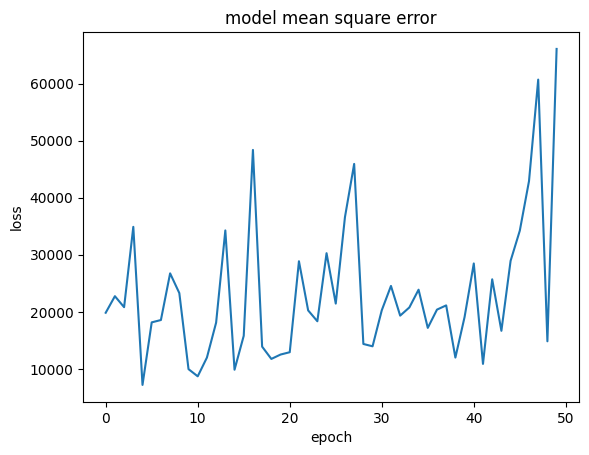

In [16]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.title('model mean square error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.savefig('../models/model_training.png')
# plt.show()